# 1. Import Libraries

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# 2. Import Dataset
This dataset is retrieved from https://bixi.com/en/open-data, Trip History 2023.

In [2]:
# import the csv file
bixi = pd.read_csv("DonneesOuvertes.csv")
bixi.head()

,STARTSTATIONNAME,STARTSTATIONARRONDISSEMENT,STARTSTATIONLATITUDE,STARTSTATIONLONGITUDE,ENDSTATIONNAME,ENDSTATIONARRONDISSEMENT,ENDSTATIONLATITUDE,ENDSTATIONLONGITUDE,STARTTIMEMS,ENDTIMEMS
0,Métro Mont-Royal (Utilités publiques / Rivard),Le Plateau-Mont-Royal,45.524236,-73.581552,Chabot / Mont-Royal,Le Plateau-Mont-Royal,45.534134,-73.573524,1698266696468,1.698267e+12
1,Rielle / Wellington,Verdun,45.460156,-73.567001,St-Jacques / McGill,Ville-Marie,45.501441,-73.560144,1698270535502,1.698272e+12
2,Ste-Catherine / Drummond,Ville-Marie,45.498588,-73.574278,Peel / Ottawa,Le Sud-Ouest,45.494200,-73.559985,1698285705974,1.698286e+12
3,Boyer / du Mont-Royal,Le Plateau-Mont-Royal,45.527432,-73.579917,de l'Hôtel-de-Ville / Rachel,Le Plateau-Mont-Royal,45.519897,-73.580106,1698269489932,1.698270e+12
4,Clark / Ontario,Ville-Marie,45.510625,-73.566903,Wolfe / Robin,Ville-Marie,45.519581,-73.560116,1698270006571,1.698270e+12


# 3. Data Cleaning
In this process, I will go through these following items:
* Duplicated values
* Null values
* Possibly inaccurate values
* Possibly inconsistent values from text fields

## 3.1. Summarize Data

In [3]:
# checking dataset overview
bixi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11790840 entries, 0 to 11790839
Data columns (total 10 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   STARTSTATIONNAME            object 
 1   STARTSTATIONARRONDISSEMENT  object 
 2   STARTSTATIONLATITUDE        float64
 3   STARTSTATIONLONGITUDE       float64
 4   ENDSTATIONNAME              object 
 5   ENDSTATIONARRONDISSEMENT    object 
 6   ENDSTATIONLATITUDE          float64
 7   ENDSTATIONLONGITUDE         float64
 8   STARTTIMEMS                 int64  
 9   ENDTIMEMS                   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 899.6+ MB


In [4]:
# checking for null values
bixi.isnull().sum()

STARTSTATIONNAME               4002
STARTSTATIONARRONDISSEMENT     4002
STARTSTATIONLATITUDE           4002
STARTSTATIONLONGITUDE          4002
ENDSTATIONNAME                67457
ENDSTATIONARRONDISSEMENT      67457
ENDSTATIONLATITUDE            67457
ENDSTATIONLONGITUDE           67457
STARTTIMEMS                       0
ENDTIMEMS                     60778
dtype: int64

There are 11790840 rows * 10 columns.
* **STARTSTATIONNAME**: There are missing values. The field represents names of start stations.
* **STARTSTATIONARRONDISSEMENT**: There are missing values. The field represents the arrondissement of the start station.
* **STARTSTATIONLATITUDE**: There are missing values. The field represents the start station's latitude.
* **STARTSTATIONLONGITUDE**: There are missing values. The field represents the start station's longitude.
* **ENDSTATIONNAME**: There are missing values. The field represents names of end stations.
* **ENDSTATIONARRONDISSEMENT**: There are missing values. The field represents the arrondissement of the end station.
* **ENDSTATIONLATITUDE**: There are missing values. The field represents the end station's latitude.
* **ENDSTATIONLONGITUDE**: There are missing values. The field represents the end station's longitude.
* **STARTTIMES**: There are no missing value. The field represents time in milliseconds since epoch, datatype is integer.
* **ENDTIMEMS**: There are missing values. The field represents time in milliseconds since epoch, datatype is float.

## 3.2. Drop duplicates

In [5]:
# show duplicated values
bixi[bixi.duplicated(keep = False)]

,STARTSTATIONNAME,STARTSTATIONARRONDISSEMENT,STARTSTATIONLATITUDE,STARTSTATIONLONGITUDE,ENDSTATIONNAME,ENDSTATIONARRONDISSEMENT,ENDSTATIONLATITUDE,ENDSTATIONLONGITUDE,STARTTIMEMS,ENDTIMEMS
946604,BAnQ (Berri),Ville-Marie,45.516014,-73.562920,BAnQ (Berri),Ville-Marie,45.516014,-73.56292,1683843641147,1.683844e+12
946644,BAnQ (Berri),Ville-Marie,45.516014,-73.562920,BAnQ (Berri),Ville-Marie,45.516014,-73.56292,1683843641147,1.683844e+12
948085,Square Viger (Berri / Viger),Ville-Marie,45.512212,-73.554629,NaN,NaN,NaN,NaN,1683843562996,NaN
948090,Gilford / St-Denis,Le Plateau-Mont-Royal,45.525115,-73.586006,NaN,NaN,NaN,NaN,1683843800775,NaN
948096,Square Viger (Berri / Viger),Ville-Marie,45.512212,-73.554629,NaN,NaN,NaN,NaN,1683843562996,NaN
...,...,...,...,...,...,...,...,...,...,...
9484040,St-Charles / Thomas-Keefer,Le Sud-Ouest,45.477605,-73.573775,NaN,NaN,NaN,NaN,1683846101623,NaN
9484046,St-Charles / Thomas-Keefer,Le Sud-Ouest,45.477605,-73.573775,NaN,NaN,NaN,NaN,1683846101623,NaN
9484049,Gilford / St-Denis,Le Plateau-Mont-Royal,45.525115,-73.586006,NaN,NaN,NaN,NaN,1683846105131,NaN
9484058,Molson / William-Tremblay,Rosemont - La Petite-Patrie,45.541548,-73.565012,NaN,NaN,NaN,NaN,1683845979166,NaN


In [6]:
# drop duplicated values
bixi.drop_duplicates(inplace = True)

## 3.3. Handle null values
There are 4002 data entries that do not specify the Start Station, and 67457 entries without proper End Station info (and 60778 without end time). This is probably due to the tracking system of Bixi, I will drop these null values.

In [7]:
bixi[(bixi["STARTSTATIONNAME"].isnull() == True) | 
     (bixi["ENDSTATIONNAME"].isnull() == True) | 
     (bixi["ENDTIMEMS"].isnull() == True)]

,STARTSTATIONNAME,STARTSTATIONARRONDISSEMENT,STARTSTATIONLATITUDE,STARTSTATIONLONGITUDE,ENDSTATIONNAME,ENDSTATIONARRONDISSEMENT,ENDSTATIONLATITUDE,ENDSTATIONLONGITUDE,STARTTIMEMS,ENDTIMEMS
285,St-Alexandre / Ste-Catherine,Ville-Marie,45.505359,-73.567741,NaN,NaN,NaN,NaN,1692502871310,NaN
286,Parc Joseph-Robin (18e avenue / Everett),Villeray - Saint-Michel - Parc-Extension,45.564811,-73.595804,NaN,NaN,NaN,NaN,1692474333449,NaN
287,LaSalle / 90e avenue,LaSalle,45.417294,-73.644300,NaN,NaN,NaN,NaN,1687389804852,NaN
288,Bercy / Rachel,Le Plateau-Mont-Royal,45.538403,-73.561964,NaN,NaN,NaN,NaN,1698285393333,NaN
1530,Mozart / Waverly,Rosemont - La Petite-Patrie,45.531565,-73.616946,NaN,NaN,NaN,NaN,1698281710965,NaN
...,...,...,...,...,...,...,...,...,...,...
11789281,Parc Joseph-Robin (18e avenue / Everett),Villeray - Saint-Michel - Parc-Extension,45.564811,-73.595804,NaN,NaN,NaN,NaN,1685818579091,NaN
11789282,Marcil / Sherbrooke,Côte-des-Neiges - Notre-Dame-de-Grâce,45.471743,-73.613924,NaN,NaN,NaN,NaN,1685818615634,NaN
11789283,Laurier / de Brébeuf,Le Plateau-Mont-Royal,45.532514,-73.584811,NaN,NaN,NaN,NaN,1685818872823,NaN
11789284,de Castelnau / Lajeunesse,Villeray - Saint-Michel - Parc-Extension,45.540396,-73.616818,NaN,NaN,NaN,NaN,1685818988440,NaN


In total, there are 71105 entries with data loss. 

In [8]:
# drop null values
bixi.drop(bixi[(bixi["STARTSTATIONNAME"].isnull() == True) | 
               (bixi["ENDSTATIONNAME"].isnull() == True) | 
               (bixi["ENDTIMEMS"].isnull() == True)].index, inplace = True)

## 3.4. Data Range and Crossfield Validation
Let's inspect data range of int and float fields.

### Coordinates 

In [9]:
bixi[["STARTSTATIONLATITUDE", "STARTSTATIONLONGITUDE", "ENDSTATIONLATITUDE", "ENDSTATIONLONGITUDE"]].describe()

,STARTSTATIONLATITUDE,STARTSTATIONLONGITUDE,ENDSTATIONLATITUDE,ENDSTATIONLONGITUDE
count,1.171968e+07,1.171968e+07,1.171968e+07,1.171968e+07
mean,4.533671e+01,-7.329891e+01,4.530771e+01,-7.325341e+01
std,2.901159e+00,4.526564e+00,3.118407e+00,4.865521e+00
min,-1.000000e+00,-7.375823e+01,-1.000000e+00,-7.375823e+01
25%,4.550367e+01,-7.359347e+01,4.550235e+01,-7.359235e+01
50%,4.552069e+01,-7.357700e+01,4.551996e+01,-7.357602e+01
75%,4.553342e+01,-7.356666e+01,4.553341e+01,-7.356395e+01
max,4.570235e+01,-1.000000e+00,4.570235e+01,-1.000000e+00


Bixi stations' coordinates in Montreal should fall somewhere along the line of (45.00, -73.00). However, I found that the min latitude and max longitude are both -1.0.

Let's find the start stations that have these coordinates.

In [10]:
bixi.sort_values(by = ["STARTSTATIONLATITUDE"], ascending = True)

,STARTSTATIONNAME,STARTSTATIONARRONDISSEMENT,STARTSTATIONLATITUDE,STARTSTATIONLONGITUDE,ENDSTATIONNAME,ENDSTATIONARRONDISSEMENT,ENDSTATIONLATITUDE,ENDSTATIONLONGITUDE,STARTTIMEMS,ENDTIMEMS
8258125,Smith / Peel,Le Sud-Ouest,-1.000000,-1.000000,Berri / Rachel,Le Plateau-Mont-Royal,45.522719,-73.577204,1683772706281,1.683774e+12
7485042,Smith / Peel,Le Sud-Ouest,-1.000000,-1.000000,de la Commune / Berri,Ville-Marie,45.510860,-73.549830,1695210619352,1.695211e+12
11266275,Smith / Peel,Le Sud-Ouest,-1.000000,-1.000000,Cypress / Peel,Ville-Marie,45.499325,-73.571768,1690504525890,1.690505e+12
9126634,Smith / Peel,Le Sud-Ouest,-1.000000,-1.000000,Bourgeoys / Favard,Le Sud-Ouest,45.479930,-73.555921,1684069986256,1.684071e+12
11266261,Smith / Peel,Le Sud-Ouest,-1.000000,-1.000000,William / Robert-Bourassa,Le Sud-Ouest,45.497165,-73.559330,1690494255968,1.690495e+12
...,...,...,...,...,...,...,...,...,...,...
7903064,Parc St-Sacrement (des Seigneurs / St-Sacrement),Terrebonne,45.702349,-73.639578,Parc St-Sacrement (des Seigneurs / St-Sacrement),Terrebonne,45.702349,-73.639578,1693587185253,1.693588e+12
9268637,Parc St-Sacrement (des Seigneurs / St-Sacrement),Terrebonne,45.702349,-73.639578,Théâtre du Vieux-Terrebonne (St-Pierre / des B...,Terrebonne,45.692233,-73.637031,1690748856109,1.690754e+12
10823019,Parc St-Sacrement (des Seigneurs / St-Sacrement),Terrebonne,45.702349,-73.639578,Parc St-Sacrement (des Seigneurs / St-Sacrement),Terrebonne,45.702349,-73.639578,1691802925111,1.691803e+12
703284,Parc St-Sacrement (des Seigneurs / St-Sacrement),Terrebonne,45.702349,-73.639578,Parc St-Sacrement (des Seigneurs / St-Sacrement),Terrebonne,45.702349,-73.639578,1689209657981,1.689213e+12


First of all, the "Smith/Peel" station has the coordinates of (-1.0, -1.0). I will modify the values to be the one I found on Google Map (45.493106560671706, -73.5561959232871).

In [11]:
bixi.loc[ bixi["STARTSTATIONNAME"] == "Smith / Peel", "STARTSTATIONLATITUDE"] = 45.493106560671706
bixi.loc[ bixi["STARTSTATIONNAME"] == "Smith / Peel", "STARTSTATIONLONGITUDE"] = -73.5561959232871

I will do the same with the End Stations.

In [12]:
bixi.sort_values(by = ["ENDSTATIONLATITUDE"], ascending = True)

,STARTSTATIONNAME,STARTSTATIONARRONDISSEMENT,STARTSTATIONLATITUDE,STARTSTATIONLONGITUDE,ENDSTATIONNAME,ENDSTATIONARRONDISSEMENT,ENDSTATIONLATITUDE,ENDSTATIONLONGITUDE,STARTTIMEMS,ENDTIMEMS
5343658,Place du Canada (Peel / des Canadiens-de-Montr...,Ville-Marie,45.497884,-73.568568,Smith / Peel,Le Sud-Ouest,-1.000000,-1.000000,1687032326982,1.687033e+12
5182335,St-Marc / Sherbrooke,Ville-Marie,45.494514,-73.583368,Smith / Peel,Le Sud-Ouest,-1.000000,-1.000000,1696357125450,1.696358e+12
11004427,Jeanne-Mance / René-Lévesque,Ville-Marie,45.506371,-73.564201,Smith / Peel,Le Sud-Ouest,-1.000000,-1.000000,1701027794201,1.701029e+12
7684372,McGill / Wellington,Ville-Marie,45.499448,-73.554899,Smith / Peel,Le Sud-Ouest,-1.000000,-1.000000,1689896399927,1.689897e+12
2372126,de la Commune / King,Ville-Marie,45.497515,-73.552571,Smith / Peel,Le Sud-Ouest,-1.000000,-1.000000,1691871784067,1.691872e+12
...,...,...,...,...,...,...,...,...,...,...
7666848,Théâtre du Vieux-Terrebonne (St-Pierre / des B...,Terrebonne,45.692233,-73.637031,Parc St-Sacrement (des Seigneurs / St-Sacrement),Terrebonne,45.702349,-73.639578,1693792814440,1.693794e+12
6031290,Terminus de bus EXO (Côte de Terrebonne),Terrebonne,45.697815,-73.654065,Parc St-Sacrement (des Seigneurs / St-Sacrement),Terrebonne,45.702349,-73.639578,1690401787760,1.690402e+12
7286521,Parc St-Sacrement (des Seigneurs / St-Sacrement),Terrebonne,45.702349,-73.639578,Parc St-Sacrement (des Seigneurs / St-Sacrement),Terrebonne,45.702349,-73.639578,1693096107900,1.693102e+12
1537626,Parc St-Sacrement (des Seigneurs / St-Sacrement),Terrebonne,45.702349,-73.639578,Parc St-Sacrement (des Seigneurs / St-Sacrement),Terrebonne,45.702349,-73.639578,1692734595605,1.692735e+12


The "Smith/Peel" station has the coordinates of (-1.0, -1.0). I will modify the values to be the one I found on Google Map (45.493106560671706, -73.5561959232871).

In [13]:
bixi.loc[bixi["ENDSTATIONNAME"] == "Smith / Peel", "ENDSTATIONLATITUDE"] = 45.493106560671706
bixi.loc[bixi["ENDSTATIONNAME"] == "Smith / Peel", "ENDSTATIONLONGITUDE"] = -73.5561959232871

Let's check the data range again. This time, the range of coordinates seem to be more realistic.

In [14]:
bixi[["STARTSTATIONLATITUDE", "STARTSTATIONLONGITUDE", "ENDSTATIONLATITUDE", "ENDSTATIONLONGITUDE"]].describe()

,STARTSTATIONLATITUDE,STARTSTATIONLONGITUDE,ENDSTATIONLATITUDE,ENDSTATIONLONGITUDE
count,1.171968e+07,1.171968e+07,1.171968e+07,1.171968e+07
mean,4.551824e+01,-7.358220e+01,4.551758e+01,-7.358093e+01
std,2.530245e-02,2.592739e-02,2.583603e-02,2.648263e-02
min,4.541577e+01,-7.375823e+01,4.541577e+01,-7.375823e+01
25%,4.550367e+01,-7.359347e+01,4.550235e+01,-7.359235e+01
50%,4.552069e+01,-7.357700e+01,4.551996e+01,-7.357602e+01
75%,4.553342e+01,-7.356666e+01,4.553341e+01,-7.356395e+01
max,4.570235e+01,-7.343606e+01,4.570235e+01,-7.343606e+01


### STARTTIMEMS and ENDTIMEMS
The End time should always be greater or equal to Start time.

In [15]:
bixi[bixi["STARTTIMEMS"] > bixi["ENDTIMEMS"]]

,STARTSTATIONNAME,STARTSTATIONARRONDISSEMENT,STARTSTATIONLATITUDE,STARTSTATIONLONGITUDE,ENDSTATIONNAME,ENDSTATIONARRONDISSEMENT,ENDSTATIONLATITUDE,ENDSTATIONLONGITUDE,STARTTIMEMS,ENDTIMEMS


There are no data entries that invalidate this logic. We can move on to the next step.


## 3.5. Inconsistent Categorical/Text Data
I suspect that there might be inconsistency in Stations' details: Station Name, Arrondissement, Latitude and Longitude. In order to make sure that the same stations will have consistent details, I will use a separate DataFrame to standardize the information.

In [16]:
# strip whitespaces from left and right sides in Station Names and Arrondissement Names
col = ["STARTSTATIONNAME", "STARTSTATIONARRONDISSEMENT", "ENDSTATIONNAME", "ENDSTATIONARRONDISSEMENT"]
bixi[col] = bixi[col].apply(lambda x: x.str.strip())

# concatenate Latitude and Longitude to create Coordinate text-type field.
bixi["STARTCOORDINATE"] = bixi["STARTSTATIONLATITUDE"].astype("str") + ", " + bixi["STARTSTATIONLONGITUDE"].astype("str")
bixi["ENDCOORDINATE"] = bixi["ENDSTATIONLATITUDE"].astype("str") + ", " + bixi["ENDSTATIONLONGITUDE"].astype("str")

# create "RIDEID" as an unique field for each ride
bixi["RIDEID"] = bixi.index + 1

In [17]:
# DataFrame station1 contains unique values of Start Stations.
station1 = pd.pivot_table (bixi, values = ['RIDEID'], 
                           index = ["STARTSTATIONNAME", "STARTSTATIONARRONDISSEMENT" ,
                                    "STARTSTATIONLATITUDE", "STARTSTATIONLONGITUDE", "STARTCOORDINATE"],
                           aggfunc = 'count')
station1.reset_index(inplace = True)
station1.head()

,STARTSTATIONNAME,STARTSTATIONARRONDISSEMENT,STARTSTATIONLATITUDE,STARTSTATIONLONGITUDE,STARTCOORDINATE,RIDEID
0,10e avenue / Masson,Rosemont - La Petite-Patrie,45.550306,-73.573353,"45.550306, -73.573353",33122
1,11e avenue / du Souvenir,Laval,45.569339,-73.704727,"45.5693391, -73.7047273",772
2,12e avenue / St-Zotique,Rosemont - La Petite-Patrie,45.556867,-73.589307,"45.556867, -73.589307",9504
3,15e avenue / Laurier,Rosemont - La Petite-Patrie,45.553320,-73.569328,"45.5533199, -73.569328",2074
4,15e avenue / Masson,Rosemont - La Petite-Patrie,45.553898,-73.571387,"45.553898, -73.571387",16238


In [18]:
station1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   STARTSTATIONNAME            938 non-null    object 
 1   STARTSTATIONARRONDISSEMENT  938 non-null    object 
 2   STARTSTATIONLATITUDE        938 non-null    float64
 3   STARTSTATIONLONGITUDE       938 non-null    float64
 4   STARTCOORDINATE             938 non-null    object 
 5   RIDEID                      938 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 44.1+ KB


In [19]:
# DataFrame station2 contains unique values of End Stations.
station2 = pd.pivot_table (bixi, values = ['RIDEID'], 
                           index = ["ENDSTATIONNAME", "ENDSTATIONARRONDISSEMENT" ,
                                    "ENDSTATIONLATITUDE", "ENDSTATIONLONGITUDE", "ENDCOORDINATE"],
                           aggfunc = 'count')
station2.reset_index(inplace = True)
station2.head()

,ENDSTATIONNAME,ENDSTATIONARRONDISSEMENT,ENDSTATIONLATITUDE,ENDSTATIONLONGITUDE,ENDCOORDINATE,RIDEID
0,10e avenue / Masson,Rosemont - La Petite-Patrie,45.550306,-73.573353,"45.550306, -73.573353",32943
1,11e avenue / du Souvenir,Laval,45.569339,-73.704727,"45.5693391, -73.7047273",909
2,12e avenue / St-Zotique,Rosemont - La Petite-Patrie,45.556867,-73.589307,"45.556867, -73.589307",8770
3,15e avenue / Laurier,Rosemont - La Petite-Patrie,45.553320,-73.569328,"45.5533199, -73.569328",1914
4,15e avenue / Masson,Rosemont - La Petite-Patrie,45.553898,-73.571387,"45.553898, -73.571387",15131


In [20]:
station2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ENDSTATIONNAME            939 non-null    object 
 1   ENDSTATIONARRONDISSEMENT  939 non-null    object 
 2   ENDSTATIONLATITUDE        939 non-null    float64
 3   ENDSTATIONLONGITUDE       939 non-null    float64
 4   ENDCOORDINATE             939 non-null    object 
 5   RIDEID                    939 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 44.1+ KB


In [21]:
# merge station1 and station2 into a DataFrame - station on Coordinate field
station = station1.merge(station2, left_on = "STARTCOORDINATE", right_on = "ENDCOORDINATE", how = "outer")
station.head()

,STARTSTATIONNAME,STARTSTATIONARRONDISSEMENT,STARTSTATIONLATITUDE,STARTSTATIONLONGITUDE,STARTCOORDINATE,RIDEID_x,ENDSTATIONNAME,ENDSTATIONARRONDISSEMENT,ENDSTATIONLATITUDE,ENDSTATIONLONGITUDE,ENDCOORDINATE,RIDEID_y
0,10e avenue / Masson,Rosemont - La Petite-Patrie,45.550306,-73.573353,"45.550306, -73.573353",33122.0,10e avenue / Masson,Rosemont - La Petite-Patrie,45.550306,-73.573353,"45.550306, -73.573353",32943
1,11e avenue / du Souvenir,Laval,45.569339,-73.704727,"45.5693391, -73.7047273",772.0,11e avenue / du Souvenir,Laval,45.569339,-73.704727,"45.5693391, -73.7047273",909
2,12e avenue / St-Zotique,Rosemont - La Petite-Patrie,45.556867,-73.589307,"45.556867, -73.589307",9504.0,12e avenue / St-Zotique,Rosemont - La Petite-Patrie,45.556867,-73.589307,"45.556867, -73.589307",8770
3,15e avenue / Laurier,Rosemont - La Petite-Patrie,45.553320,-73.569328,"45.5533199, -73.569328",2074.0,15e avenue / Laurier,Rosemont - La Petite-Patrie,45.553320,-73.569328,"45.5533199, -73.569328",1914
4,15e avenue / Masson,Rosemont - La Petite-Patrie,45.553898,-73.571387,"45.553898, -73.571387",16238.0,15e avenue / Masson,Rosemont - La Petite-Patrie,45.553898,-73.571387,"45.553898, -73.571387",15131


In [22]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   STARTSTATIONNAME            980 non-null    object 
 1   STARTSTATIONARRONDISSEMENT  980 non-null    object 
 2   STARTSTATIONLATITUDE        980 non-null    float64
 3   STARTSTATIONLONGITUDE       980 non-null    float64
 4   STARTCOORDINATE             980 non-null    object 
 5   RIDEID_x                    980 non-null    float64
 6   ENDSTATIONNAME              981 non-null    object 
 7   ENDSTATIONARRONDISSEMENT    981 non-null    object 
 8   ENDSTATIONLATITUDE          981 non-null    float64
 9   ENDSTATIONLONGITUDE         981 non-null    float64
 10  ENDCOORDINATE               981 non-null    object 
 11  RIDEID_y                    981 non-null    int64  
dtypes: float64(5), int64(1), object(6)
memory usage: 92.1+ KB


In [23]:
# drop rows with duplicated "ENDCOORDINATE"
station.drop_duplicates(subset = ["ENDCOORDINATE"], inplace = True)

In [24]:
# double check rows with duplicated "STARTSTATIONNAME" but different Coordinate
station[station.duplicated(subset = ["STARTSTATIONNAME"], keep = False)]

,STARTSTATIONNAME,STARTSTATIONARRONDISSEMENT,STARTSTATIONLATITUDE,STARTSTATIONLONGITUDE,STARTCOORDINATE,RIDEID_x,ENDSTATIONNAME,ENDSTATIONARRONDISSEMENT,ENDSTATIONLATITUDE,ENDSTATIONLONGITUDE,ENDCOORDINATE,RIDEID_y


In [25]:
# double check rows with duplicated "ENDSTATIONNAME" but different Coordinate
station[station.duplicated(subset = ["ENDSTATIONNAME"], keep = False)]

,STARTSTATIONNAME,STARTSTATIONARRONDISSEMENT,STARTSTATIONLATITUDE,STARTSTATIONLONGITUDE,STARTCOORDINATE,RIDEID_x,ENDSTATIONNAME,ENDSTATIONARRONDISSEMENT,ENDSTATIONLATITUDE,ENDSTATIONLONGITUDE,ENDCOORDINATE,RIDEID_y


In [26]:
station.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 980
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   STARTSTATIONNAME            918 non-null    object 
 1   STARTSTATIONARRONDISSEMENT  918 non-null    object 
 2   STARTSTATIONLATITUDE        918 non-null    float64
 3   STARTSTATIONLONGITUDE       918 non-null    float64
 4   STARTCOORDINATE             918 non-null    object 
 5   RIDEID_x                    918 non-null    float64
 6   ENDSTATIONNAME              919 non-null    object 
 7   ENDSTATIONARRONDISSEMENT    919 non-null    object 
 8   ENDSTATIONLATITUDE          919 non-null    float64
 9   ENDSTATIONLONGITUDE         919 non-null    float64
 10  ENDCOORDINATE               919 non-null    object 
 11  RIDEID_y                    919 non-null    int64  
dtypes: float64(5), int64(1), object(6)
memory usage: 93.3+ KB


There is one STARTSTATION row that is null, thus it seems like the ENDSTATION list is more complete. I will drop rows from the STARTSTATION side.

In [27]:
# drop columns from STARTSTATION side
station.drop(columns = ["STARTSTATIONNAME", "STARTSTATIONARRONDISSEMENT", "STARTSTATIONLATITUDE", "STARTSTATIONLONGITUDE",
                        "STARTCOORDINATE", "RIDEID_x", "RIDEID_y"], inplace = True)

# rename remaining columns
station.rename(columns = {"ENDSTATIONNAME":"NAME", "ENDSTATIONARRONDISSEMENT": "ARRONDISSEMENT",
                          "ENDSTATIONLATITUDE":"LATITUDE", "ENDSTATIONLONGITUDE":"LONGITUDE",
                          "ENDCOORDINATE" : "COORDINATE"}, inplace = True)
station.head()

,NAME,ARRONDISSEMENT,LATITUDE,LONGITUDE,COORDINATE
0,10e avenue / Masson,Rosemont - La Petite-Patrie,45.550306,-73.573353,"45.550306, -73.573353"
1,11e avenue / du Souvenir,Laval,45.569339,-73.704727,"45.5693391, -73.7047273"
2,12e avenue / St-Zotique,Rosemont - La Petite-Patrie,45.556867,-73.589307,"45.556867, -73.589307"
3,15e avenue / Laurier,Rosemont - La Petite-Patrie,45.553320,-73.569328,"45.5533199, -73.569328"
4,15e avenue / Masson,Rosemont - La Petite-Patrie,45.553898,-73.571387,"45.553898, -73.571387"


Next, I will merge the Start Stations and End Stations from **bixi** with those in **station**, then leaving only the station details from **station** in the table.

In [28]:
# merge the Start Stations
bixi_merged1 = bixi.merge(station, left_on = "STARTCOORDINATE", right_on = "COORDINATE", how = "left")
bixi_merged1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11719684 entries, 0 to 11719683
Data columns (total 18 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   STARTSTATIONNAME            object 
 1   STARTSTATIONARRONDISSEMENT  object 
 2   STARTSTATIONLATITUDE        float64
 3   STARTSTATIONLONGITUDE       float64
 4   ENDSTATIONNAME              object 
 5   ENDSTATIONARRONDISSEMENT    object 
 6   ENDSTATIONLATITUDE          float64
 7   ENDSTATIONLONGITUDE         float64
 8   STARTTIMEMS                 int64  
 9   ENDTIMEMS                   float64
 10  STARTCOORDINATE             object 
 11  ENDCOORDINATE               object 
 12  RIDEID                      int64  
 13  NAME                        object 
 14  ARRONDISSEMENT              object 
 15  LATITUDE                    float64
 16  LONGITUDE                   float64
 17  COORDINATE                  object 
dtypes: float64(7), int64(2), object(9)
memory usage: 1.6+ GB


In [29]:
# merge the End Stations
bixi_merged = bixi_merged1.merge(station, left_on = "ENDCOORDINATE", right_on = "COORDINATE", how = "left")
bixi_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11719684 entries, 0 to 11719683
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   STARTSTATIONNAME            object 
 1   STARTSTATIONARRONDISSEMENT  object 
 2   STARTSTATIONLATITUDE        float64
 3   STARTSTATIONLONGITUDE       float64
 4   ENDSTATIONNAME              object 
 5   ENDSTATIONARRONDISSEMENT    object 
 6   ENDSTATIONLATITUDE          float64
 7   ENDSTATIONLONGITUDE         float64
 8   STARTTIMEMS                 int64  
 9   ENDTIMEMS                   float64
 10  STARTCOORDINATE             object 
 11  ENDCOORDINATE               object 
 12  RIDEID                      int64  
 13  NAME_x                      object 
 14  ARRONDISSEMENT_x            object 
 15  LATITUDE_x                  float64
 16  LONGITUDE_x                 float64
 17  COORDINATE_x                object 
 18  NAME_y                      object 
 19  ARRONDISSEMENT_y   

In [30]:
# select only details from the original "station" DataFrame
bixi_merged = bixi_merged[["RIDEID", "NAME_x", "ARRONDISSEMENT_x", "LATITUDE_x", 
                           "LONGITUDE_x", "COORDINATE_x", "NAME_y", "ARRONDISSEMENT_y",
                          "LATITUDE_y", "LONGITUDE_y", "COORDINATE_y", "STARTTIMEMS", "ENDTIMEMS"]]

# rename the columns
bixi_merged.rename(columns = {"NAME_x" : "STARTSTATIONNAME", "ARRONDISSEMENT_x" : "STARTSTATIONARRONDISSEMENT",
                             "LATITUDE_x" : "STARTSTATIONLATITUDE", "LONGITUDE_x" : "STARTSTATIONLONGITUDE",
                              "COORDINATE_x":"STARTCOORDINATE", "COORDINATE_y":"ENDCOORDINATE",
                             "NAME_y" : "ENDSTATIONNAME", "ARRONDISSEMENT_y" : "ENDSTATIONARRONDISSEMENT",
                             "LATITUDE_y" : "ENDSTATIONLATITUDE", "LONGITUDE_y" : "ENDSTATIONLONGITUDE"},
                  inplace = True)

bixi_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11719684 entries, 0 to 11719683
Data columns (total 13 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   RIDEID                      int64  
 1   STARTSTATIONNAME            object 
 2   STARTSTATIONARRONDISSEMENT  object 
 3   STARTSTATIONLATITUDE        float64
 4   STARTSTATIONLONGITUDE       float64
 5   STARTCOORDINATE             object 
 6   ENDSTATIONNAME              object 
 7   ENDSTATIONARRONDISSEMENT    object 
 8   ENDSTATIONLATITUDE          float64
 9   ENDSTATIONLONGITUDE         float64
 10  ENDCOORDINATE               object 
 11  STARTTIMEMS                 int64  
 12  ENDTIMEMS                   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 1.1+ GB


In [31]:
# check for the null values
bixi_merged.isnull().sum()

RIDEID                        0
STARTSTATIONNAME              0
STARTSTATIONARRONDISSEMENT    0
STARTSTATIONLATITUDE          0
STARTSTATIONLONGITUDE         0
STARTCOORDINATE               0
ENDSTATIONNAME                0
ENDSTATIONARRONDISSEMENT      0
ENDSTATIONLATITUDE            0
ENDSTATIONLONGITUDE           0
ENDCOORDINATE                 0
STARTTIMEMS                   0
ENDTIMEMS                     0
dtype: int64

Since all original data from **bixi** has been matched properly with the data in **station**, I can ensure that the text fields that represent the stations' details are consistent.

# 4. Data Preprocessing
In this process, I would add new columns to the DataFrame, which might be useful for data analysis.
* **STARTDATETIME**: Start Time of the ride, datetime type
* **ENDDATETIME**: End Time of the ride, datetime type
* **DURATION**: The difference between Start Time and End Time of a ride, in term of minutes
* Other time units of Start Time: **MONTH**, **DAY**, **DAYOFWEEK**, **HOUR**

In [32]:
# add new datetime columns
bixi_merged["STARTDATETIME"] = pd.DatetimeIndex(pd.to_datetime(bixi_merged["STARTTIMEMS"], unit="ms")).tz_localize('UTC').tz_convert('America/Montreal')
bixi_merged["ENDDATETIME"] = pd.DatetimeIndex(pd.to_datetime(bixi_merged["ENDTIMEMS"], unit="ms")).tz_localize('UTC').tz_convert('America/Montreal')

# add duration column
bixi_merged["DURATION"] = (bixi_merged["ENDTIMEMS"] - bixi_merged["STARTTIMEMS"])/60000

# add time units columns
bixi_merged["MONTH"] = bixi_merged["STARTDATETIME"].dt.month_name()
bixi_merged["DAYOFWEEK"] = bixi_merged["STARTDATETIME"].dt.day_name()
bixi_merged["HOUR"] = bixi_merged["STARTDATETIME"].dt.hour
bixi_merged["DATE"] = bixi_merged["STARTDATETIME"].dt.date

# set MONTH and DAYOFWEEK to be categorical and ordered
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September",
          "October", "November", "December"]
dayofweek = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
bixi_merged["MONTH"] = pd.Categorical(bixi_merged["MONTH"], categories=months, ordered=True)
bixi_merged["DAYOFWEEK"] = pd.Categorical(bixi_merged["DAYOFWEEK"], categories=dayofweek, ordered=True)

bixi_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11719684 entries, 0 to 11719683
Data columns (total 20 columns):
 #   Column                      Dtype                           
---  ------                      -----                           
 0   RIDEID                      int64                           
 1   STARTSTATIONNAME            object                          
 2   STARTSTATIONARRONDISSEMENT  object                          
 3   STARTSTATIONLATITUDE        float64                         
 4   STARTSTATIONLONGITUDE       float64                         
 5   STARTCOORDINATE             object                          
 6   ENDSTATIONNAME              object                          
 7   ENDSTATIONARRONDISSEMENT    object                          
 8   ENDSTATIONLATITUDE          float64                         
 9   ENDSTATIONLONGITUDE         float64                         
 10  ENDCOORDINATE               object                          
 11  STARTTIMEMS           

In [33]:
# check the datarange of "STARTDATETIME" and "ENDDATETIME"
bixi_merged[["STARTDATETIME", "ENDDATETIME"]].describe()

,STARTDATETIME,ENDDATETIME
count,11719684,11719684
mean,2023-08-02 03:17:34.188798976-04:00,2023-08-02 03:34:23.783767808-04:00
min,2023-04-12 11:42:44.387000-04:00,2023-04-12 11:45:57.456999936-04:00
25%,2023-06-12 17:23:43.072000-04:00,2023-06-12 17:38:41.648999936-04:00
50%,2023-08-02 18:10:18.491000064-04:00,2023-08-02 18:25:37.848499968-04:00
75%,2023-09-19 15:12:43.571500032-04:00,2023-09-19 15:27:27.641499904-04:00
max,2023-12-31 23:59:40.429000-05:00,2024-01-08 14:05:25.089999872-05:00


In [34]:
# check the datarange of "DURATION"
bixi_merged["DURATION"].describe()

count    1.171968e+07
mean     1.682658e+01
std      3.068419e+02
min      1.500000e-04
25%      5.964417e+00
50%      1.042398e+01
75%      1.779457e+01
max      2.393719e+05
Name: DURATION, dtype: float64

The data range of STARTDATETIME, ENDDATETIME, and DURATION seem to be reasonable.

In [35]:
bixi_merged.head()

,RIDEID,STARTSTATIONNAME,STARTSTATIONARRONDISSEMENT,STARTSTATIONLATITUDE,STARTSTATIONLONGITUDE,STARTCOORDINATE,ENDSTATIONNAME,ENDSTATIONARRONDISSEMENT,ENDSTATIONLATITUDE,ENDSTATIONLONGITUDE,ENDCOORDINATE,STARTTIMEMS,ENDTIMEMS,STARTDATETIME,ENDDATETIME,DURATION,MONTH,DAYOFWEEK,HOUR,DATE
0,1,Métro Mont-Royal (Utilités publiques / Rivard),Le Plateau-Mont-Royal,45.524236,-73.581552,"45.5242361, -73.5815522",Chabot / Mont-Royal,Le Plateau-Mont-Royal,45.534134,-73.573524,"45.5341344, -73.5735244",1698266696468,1.698267e+12,2023-10-25 16:44:56.468000-04:00,2023-10-25 16:51:32.112999936-04:00,6.594083,October,Wednesday,16,2023-10-25
1,2,Rielle / Wellington,Verdun,45.460156,-73.567001,"45.4601559, -73.5670012",St-Jacques / McGill,Ville-Marie,45.501441,-73.560144,"45.501441, -73.560144",1698270535502,1.698272e+12,2023-10-25 17:48:55.502000-04:00,2023-10-25 18:12:47.951000064-04:00,23.874150,October,Wednesday,17,2023-10-25
2,3,Ste-Catherine / Drummond,Ville-Marie,45.498588,-73.574278,"45.4985885, -73.5742781",Peel / Ottawa,Le Sud-Ouest,45.494200,-73.559985,"45.4941996, -73.5599846",1698285705974,1.698286e+12,2023-10-25 22:01:45.974000-04:00,2023-10-25 22:06:32.417999872-04:00,4.774067,October,Wednesday,22,2023-10-25
3,4,Boyer / du Mont-Royal,Le Plateau-Mont-Royal,45.527432,-73.579917,"45.527432, -73.579917",de l'Hotel-de-Ville / Rachel,Le Plateau-Mont-Royal,45.519897,-73.580106,"45.5198966, -73.5801065",1698269489932,1.698270e+12,2023-10-25 17:31:29.932000-04:00,2023-10-25 17:36:54.383000064-04:00,5.407517,October,Wednesday,17,2023-10-25
4,5,Clark / Ontario,Ville-Marie,45.510625,-73.566903,"45.5106246, -73.5669033",Wolfe / Robin,Ville-Marie,45.519581,-73.560116,"45.519581, -73.560116",1698270006571,1.698270e+12,2023-10-25 17:40:06.571000-04:00,2023-10-25 17:47:20.297999872-04:00,7.228783,October,Wednesday,17,2023-10-25


# 5. DATA ANALYSIS
## 5.1. What are the top 10 popular routes?

In [36]:
# create a pivot table that would count the number of ride for each pair of Start Station - End Station
bixi_route = pd.pivot_table(bixi_merged, values = ["RIDEID"], 
                            index = ["STARTCOORDINATE",  "ENDCOORDINATE", "STARTSTATIONNAME", "ENDSTATIONNAME"],
                            aggfunc = "count")
bixi_route.reset_index(inplace = True)
bixi_route.sort_values(by = "RIDEID", ascending = False).head(10)

,STARTCOORDINATE,ENDCOORDINATE,STARTSTATIONNAME,ENDSTATIONNAME,RIDEID
143201,"45.5128006, -73.5311159","45.5128006, -73.5311159",Métro Jean-Drapeau,Métro Jean-Drapeau,10773
122248,"45.50761, -73.551836","45.50761, -73.551836",de la Commune / Place Jacques-Cartier,de la Commune / Place Jacques-Cartier,4983
29838,"45.477605, -73.573775","45.477605, -73.573775",St-Charles / Thomas-Keefer,St-Charles / Thomas-Keefer,4152
386151,"45.5543734, -73.5513747","45.551192, -73.540873",Métro Pie-IX (Pierre-de-Coubertin / Desjardins),Desjardins / Ontario,3767
106075,"45.504242, -73.55347","45.504242, -73.55347",de la Commune / St-Sulpice,de la Commune / St-Sulpice,3622
7788,"45.453016, -73.571915","45.459488, -73.572092",Argyle / de Verdun,Métro Verdun (Willibrord / de Verdun),3481
376124,"45.551192, -73.540873","45.5543734, -73.5513747",Desjardins / Ontario,Métro Pie-IX (Pierre-de-Coubertin / Desjardins),3389
137007,"45.5107698, -73.5649373","45.5107698, -73.5649373",Métro St-Laurent ( de Maisonneuve / St-Laurent),Métro St-Laurent ( de Maisonneuve / St-Laurent),3297
116298,"45.5065198, -73.576405","45.513303, -73.572961",Milton / University,Clark / Prince-Arthur,3104
11890,"45.459488, -73.572092","45.453016, -73.571915",Métro Verdun (Willibrord / de Verdun),Argyle / de Verdun,3084


Top 10 popular routes are made up of 5 roundtrips and 5 other routes. The most popular route is the roundtrip in Métro Jean-Drapeau	station.

In [37]:
print("The percentage between round trips and total number of trips is: " + 
      ((bixi_route[bixi_route["STARTSTATIONNAME"] == bixi_route["ENDSTATIONNAME"]]["RIDEID"].sum())/ bixi_route["RIDEID"].sum()*100).astype(str) +
      "%")

The percentage between round trips and total number of trips is: 4.671832448724727%


## 5.2. At which time, bixi are used more often?

In [38]:
# make pivot tables with index = time units, values = count of rides
bixi_month = pd.pivot_table(bixi_merged, values = 'RIDEID', index = ['MONTH'], aggfunc = 'count')
bixi_dayofweek = pd.pivot_table(bixi_merged, values = 'RIDEID', index = ['DAYOFWEEK'], aggfunc = 'count')
bixi_date = pd.pivot_table(bixi_merged, values = 'RIDEID', index = ['DATE'], aggfunc = 'count')
bixi_hour = pd.pivot_table(bixi_merged, values = 'RIDEID', index = ['HOUR'], aggfunc = 'count')

<AxesSubplot:xlabel='MONTH'>

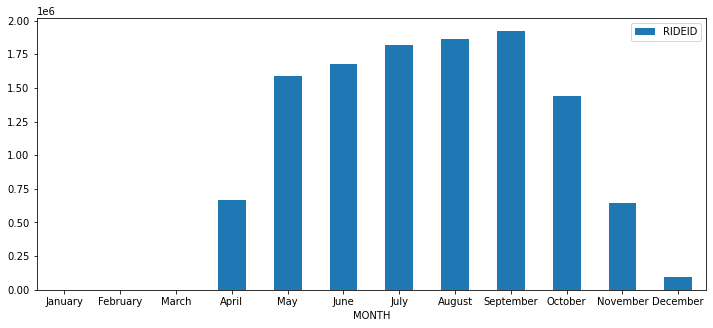

In [39]:
# a bar plot represents the number of rides in each month.
bixi_month.plot(kind = "bar", figsize=(12,5), rot=0)

Bixi season 2023 started on April 12, and we can see that people would ride Bixi more frequently throughout summer and fall (from May to October) when the weather is more comfortable to be active outdoors.

The total number of rides will start to drop in November, and then Bixi would close most of their stations during winter, thus not many rides in December.

<AxesSubplot:xlabel='DATE'>

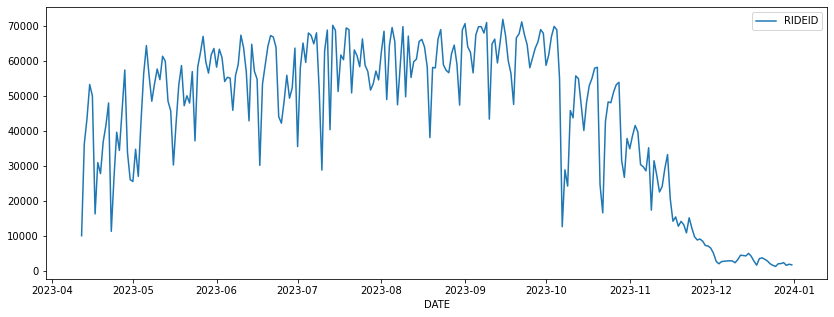

In [40]:
# a bar plot represents the number of rides in each day.
bixi_date.plot(figsize=(14,5))

The bar plot representing the daily number of rides in 2023 displays a clearer view on the previous plot. An interesting pattern we are seeing is that from mid-July to the beginning of October, the daily count of rides fluctuates less than in other periods. It seems that when the weather is warm and nice, people would develop a more consistent habit of riding Bixi.

To determine whether the same individuals were riding Bixi more frequently, it's crucial to have more data regarding the users (for example, users' membership types, etc.). For this project, I would stick to exploring the pattern between timing, location, and the number of rides.

#### Are there any days we perceive records to be outstanding?

<AxesSubplot:>

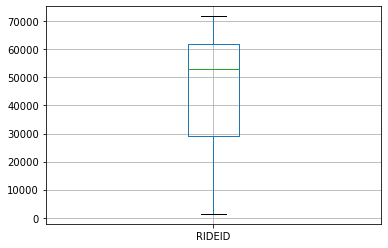

In [41]:
bixi_date.boxplot()

The answer is no.

<AxesSubplot:xlabel='DAYOFWEEK'>

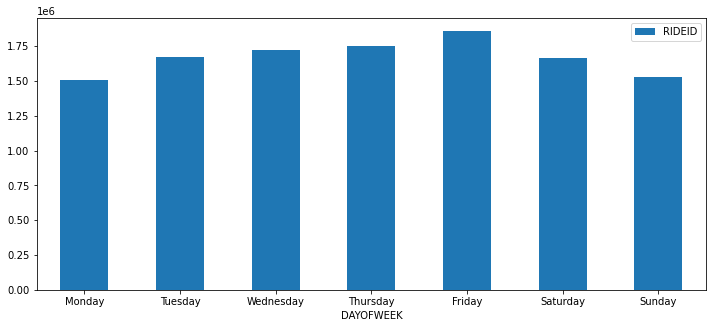

In [42]:
# a bar plot represents the number of rides between different days of the week.
bixi_dayofweek.plot(kind = "bar", figsize=(12,5), rot=0)

There is not much of a difference between each day of the week. The total number of rides would increase gradually throughout the week, from Monday to Friday, then slightly drop during the weekend. People would probably ride more on Friday.

<AxesSubplot:xlabel='HOUR'>

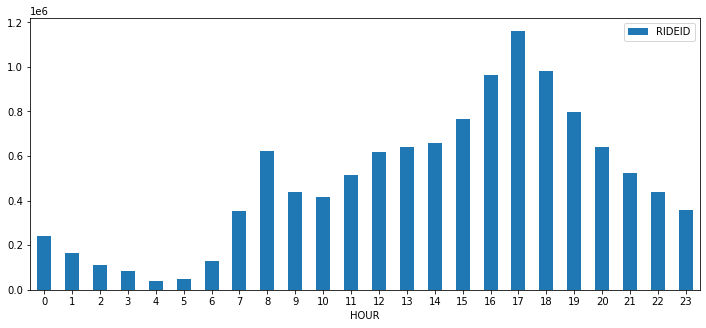

In [43]:
# a bar plot represents the number of rides between different hours of the day.
bixi_hour.plot(kind = "bar", figsize=(12,5), rot=0)

This is an interesting plot showing that people would start to ride Bixi more from the beginning of normal office hours (8 am/9 am to 5 pm). There is a small hike at 8 am (compared to the hour before and after it), and then the biggest hike at 5 pm. There is a chance that many people use Bixi as a means to travel to work.

## 5.3. Average ride duration throughout the year 2023

In [44]:
print("The average duration of bixi rides in 2023: " + bixi_merged["DURATION"].mean().astype(str) + " minutes.")

The average duration of bixi rides in 2023: 16.82658284563248 minutes.


<AxesSubplot:xlabel='DATE'>

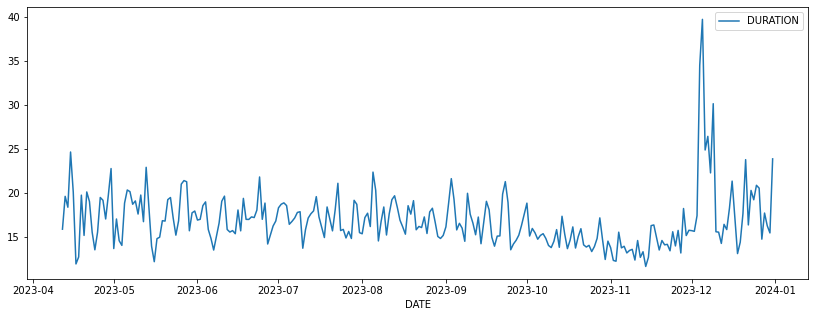

In [45]:
# a pivot table of average duration through each recorded day in 2023.
bixi_duration_date = pd.pivot_table(bixi_merged, values = ['DURATION', 'RIDEID'], index = 'DATE', 
                               aggfunc = {'DURATION':'mean', 'RIDEID':'count'})

bixi_duration_date.plot(y="DURATION", figsize=(14,5))

<AxesSubplot:>

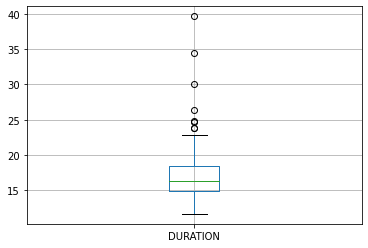

In [46]:
bixi_duration_date.boxplot("DURATION")

There are a few special hikes in December, and according to the boxplot function above, there are around 6 outliers in the whole dataset.

In [47]:
# find out top 10 dates that record the highest average duration.
bixi_duration_date.sort_values(by = 'DURATION', ascending = False).head(10)

,DURATION,RIDEID
DATE,,
2023-12-05,39.676379,2711
2023-12-04,34.460739,2095
2023-12-09,30.107313,2897
2023-12-07,26.399502,2917
2023-12-06,24.854125,2826
2023-04-15,24.626229,53239
2023-12-31,23.846999,1787
2023-12-21,23.759396,3394
2023-05-13,22.888972,59861


Dates in December have the highest average duration, however, the number of rides is low, only around 3,000 rides per day.

Bixi season 2023 started on April 12, which is where we see a hike in the number of rides. And April 15, 2023, the first Saturday after the start of the Bixi season has recorded a high number of rides as well as the average duration.